In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('retail_raw_reduced.csv')

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data for December 2019
december_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]
print(december_data.head(10))

    order_id order_date  customer_id             city     province product_id  \
8    1741846 2019-12-30        16873    Jakarta Barat  DKI Jakarta      P3203   
14   1734790 2019-12-18        17422  Jakarta Selatan  DKI Jakarta      P0122   
19   1731961 2019-12-13        13880            Bogor   Jawa Barat      P2853   
34   1724590 2019-12-02        15719    Jakarta Barat  DKI Jakarta      P1892   
35   1741561 2019-12-29        13521          Bandung   Jawa Barat      P3344   
38   1735633 2019-12-19        17096  Jakarta Selatan  DKI Jakarta      P3285   
46   1725274 2019-12-03        17160    Jakarta Utara  DKI Jakarta      P3045   
48   1729846 2019-12-10        17231           Bekasi   Jawa Barat      P3537   
50   1729615 2019-12-10        14725    Jakarta Utara  DKI Jakarta      P0737   
51   1726822 2019-12-05        14096        Surakarta  Jawa Tengah      P0790   

      brand  quantity  item_price  
8   BRAND_S        32      450000  
14  BRAND_A        12      695000  


**Jumlah pembeli harian selama bulan Desember.**

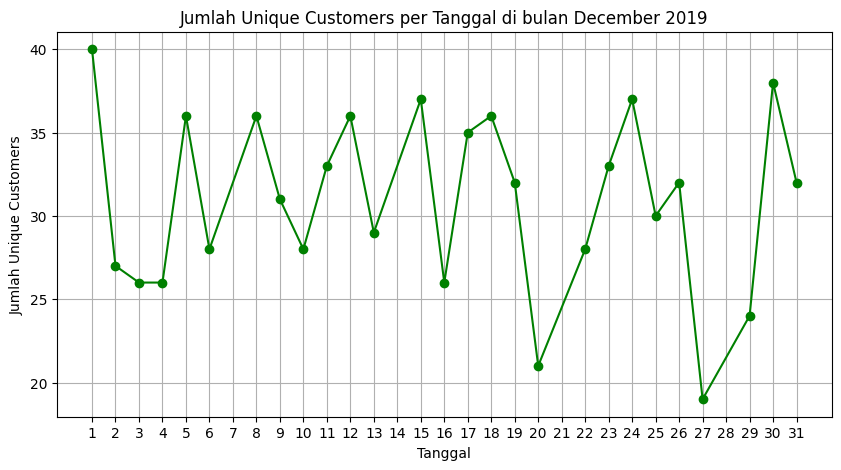

In [34]:
# Menghitung jumlah unique customers di tiap tanggal
daily_customers = december_data['customer_id'].groupby(december_data['order_date'].dt.day).nunique()

# Membuat line chart jumlah unique customers
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o', color='green')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Unique Customers')
plt.title('Jumlah Unique Customers per Tanggal di bulan December 2019')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()


**Case 1:**

In [35]:
# Menghitung total quantity penjualan per brand di bulan Desember 2019
top5_brands = december_data.groupby('brand')['quantity'].sum().nlargest(5)

# Membuat variabel dataset_top5brand_dec yang berisi data penjualan bulan Desember 2019 untuk top 5 brand
dataset_top5brand_dec = december_data[december_data['brand'].isin(top5_brands.index)]

# Menampilkan top 5 brands beserta quantity terjual
print("Top 5 brands dengan total quantity penjualan tertinggi di bulan Desember 2019:")
for i, (brand, quantity) in enumerate(top5_brands.items(), 1):
    print(i, ".", brand, " | ""total quantity:", quantity)

Top 5 brands dengan total quantity penjualan tertinggi di bulan Desember 2019:
1 . BRAND_S  | total quantity: 2197
2 . BRAND_P  | total quantity: 2194
3 . BRAND_R  | total quantity: 1508
4 . BRAND_C  | total quantity: 1365
5 . BRAND_A  | total quantity: 1315


**Case 2: Multi-line chart daily quantity untuk brand top 5**

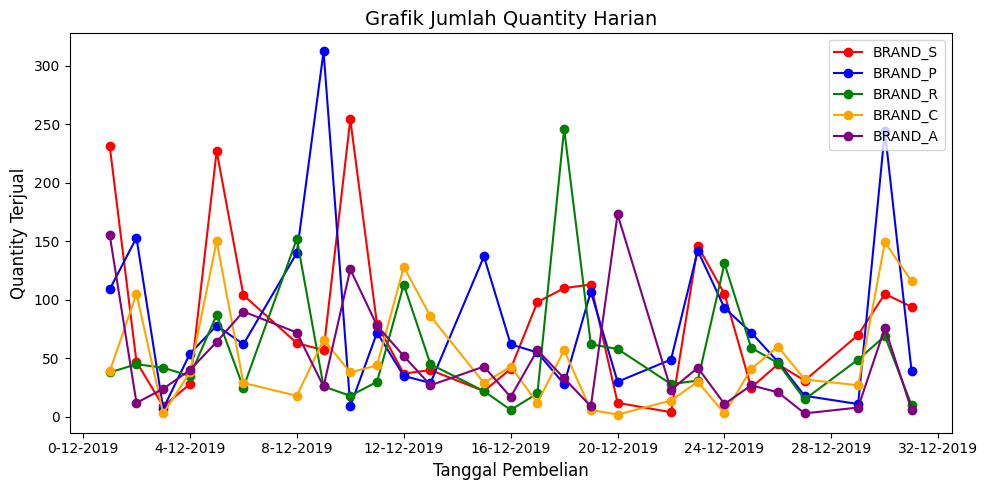

In [36]:
# Group data berdasarkan tanggal dan brand, lalu hitung jumlah quantity
daily_quantity = december_data.groupby(['order_date', 'brand'])['quantity'].sum().unstack()

# Filter data untuk top 5 brand dengan jumlah quantity tertinggi
top_5_brands = daily_quantity.sum().nlargest(5).index
daily_quantity_top5 = daily_quantity[top_5_brands]

# Menggambar multi-line chart
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['red', 'blue', 'green', 'orange', 'purple']  # Warna baru untuk setiap garis
for i, column in enumerate(daily_quantity_top5.columns):
    ax.plot(daily_quantity_top5.index.day, daily_quantity_top5[column], marker='o', label=column, color=colors[i])

# Mencari tanggal dengan lonjakan
date_of_spike = daily_quantity_top5.sum(axis=1).idxmax()
max_quantity = daily_quantity_top5.sum(axis=1).max()

# Menambahkan anotasi untuk titik lonjakan
ax.annotate('Lonjakan', xy=(date_of_spike.day, max_quantity), xytext=(date_of_spike.day, max_quantity + 5),
            arrowprops=dict(facecolor='white', arrowstyle='->'))

# Menambahkan judul dan label sumbu
ax.set_title('Grafik Jumlah Quantity Harian', fontsize=14)
ax.set_xlabel('Tanggal Pembelian', fontsize=12)
ax.set_ylabel('Quantity Terjual', fontsize=12)

# Menampilkan legenda
ax.legend()

# Mengatur format tanggal pada sumbu x
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}-12-2019'))

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Case 3:**

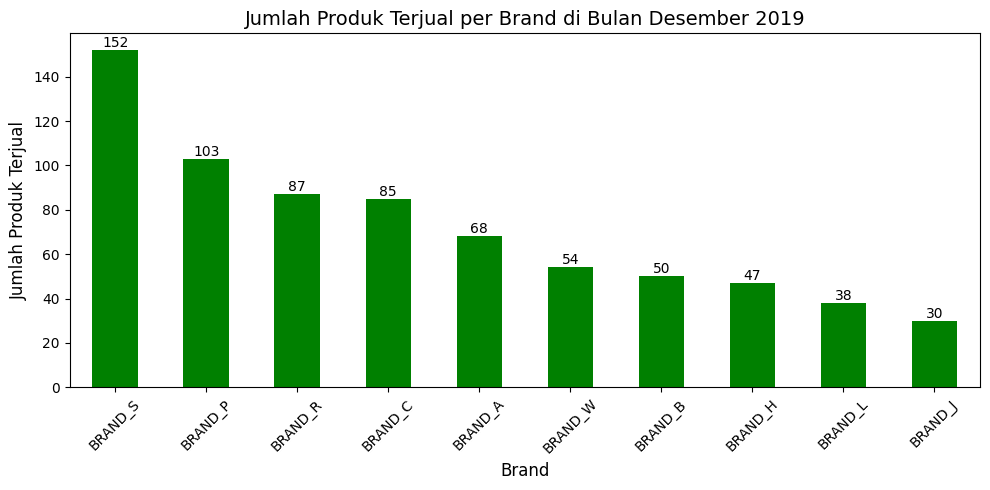

In [28]:
# Menghitung jumlah produk terjual untuk setiap merek (brand) dan mengurutkannya
brand_product_count = december_data.groupby('brand')['product_id'].nunique()
brand_product_count_sorted = brand_product_count.sort_values(ascending=False)

# Menampilkan jumlah produk terjual per brand di bulan Desember 2019 dalam bentuk bar chart
fig, ax = plt.subplots(figsize=(10, 5))
brand_product_count_sorted.plot(kind='bar', color='green', ax=ax)

# Mengatur judul dan label sumbu
ax.set_title('Jumlah Produk Terjual per Brand di Bulan Desember 2019', fontsize=14)
ax.set_xlabel('Brand', fontsize=12)
ax.set_ylabel('Jumlah Produk Terjual', fontsize=12)

# Mengatur miring (diagonal) untuk label brand
ax.set_xticklabels(brand_product_count_sorted.index, rotation=45, ha='center')

# Menampilkan nilai di atas setiap bar
for i, value in enumerate(brand_product_count_sorted.values):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Menampilkan bar chart
plt.tight_layout()
plt.show()

**Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019**

<ipython-input-42-c95fe2119070>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_data['sales_category'] = np.where(december_data['quantity'] >= 100, '>=100', '<100')


<Figure size 1000x500 with 0 Axes>

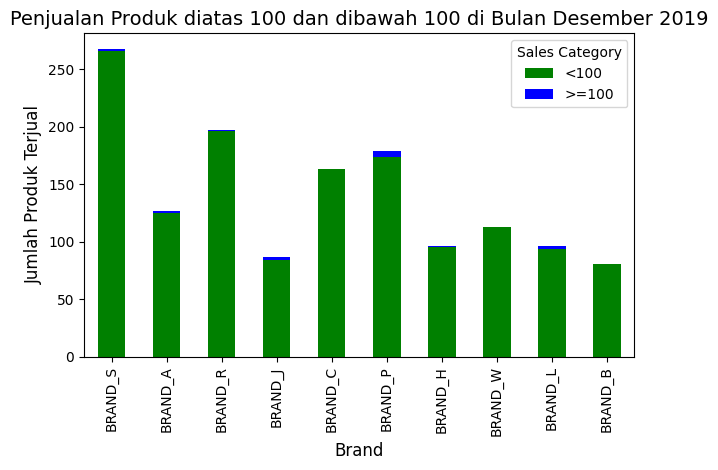

In [42]:
# Membuat kolom baru untuk kategori penjualan (>=100 atau <100)
december_data['sales_category'] = np.where(december_data['quantity'] >= 100, '>=100', '<100')

# Menghitung jumlah produk terjual per brand dan kategori penjualan
brand_sales_category_count = december_data.groupby(['brand', 'sales_category']).size().unstack()

# Mengurutkan brand berdasarkan jumlah produk terjual secara keseluruhan
brand_sales_category_count = brand_sales_category_count.reindex(december_data['brand'].unique())

# Membuat stacked chart
plt.figure(figsize=(10, 5))
brand_sales_category_count.plot(kind='bar', stacked=True, color=['green', 'blue'])

# Mengatur judul dan label sumbu
plt.title('Penjualan Produk diatas 100 dan dibawah 100 di Bulan Desember 2019', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Jumlah Produk Terjual', fontsize=12)

# Menampilkan legenda
plt.legend(title='Sales Category')

# Menampilkan stacked chart
plt.tight_layout()
plt.show()

**Case 5: Murah atau mahalkah harga produk brand top 5**

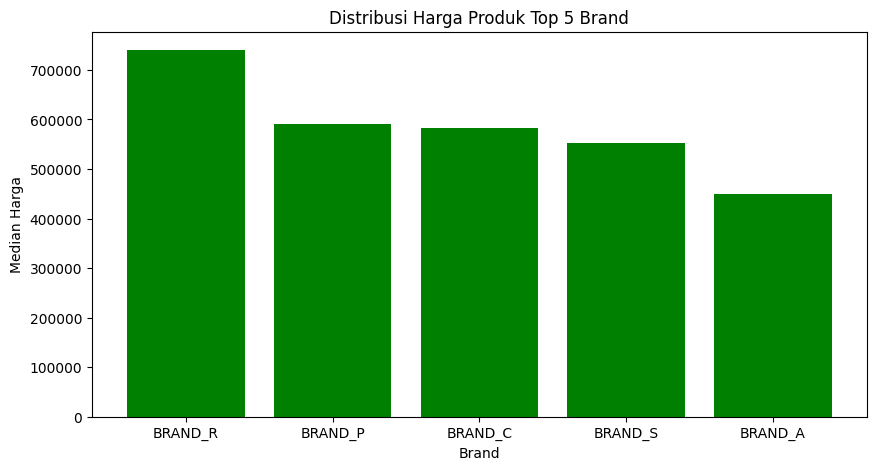

In [47]:
# Menghitung median harga produk untuk setiap product_id dalam dataset_top5brand_dec
median_harga_produk = dataset_top5brand_dec.groupby('brand')['item_price'].median()
median_harga_produk_sorted = median_harga_produk.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(median_harga_produk_sorted.index, median_harga_produk_sorted.values, color='green')

# Mengatur label dan judul
ax.set_xlabel('Brand')
ax.set_ylabel('Median Harga')
ax.set_title('Distribusi Harga Produk Top 5 Brand')

# Menampilkan histogram
plt.show()

**Case 6a: Korelasi quantity vs GMV**

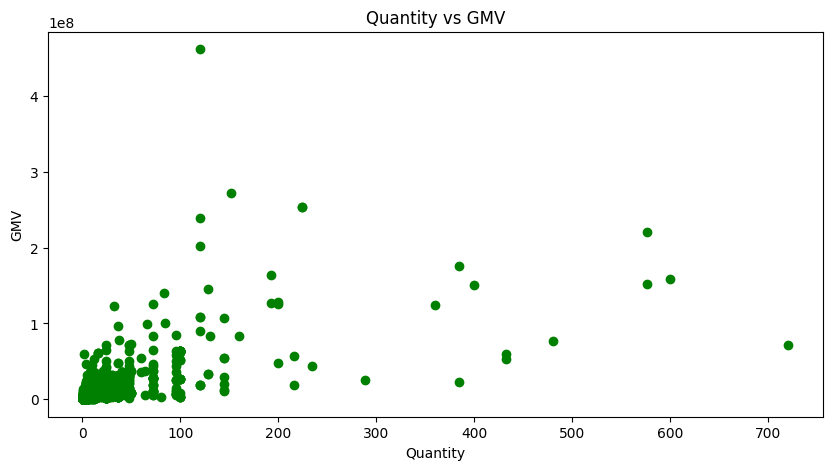

Korelasi quantity vs GMV: 0.6269420804799786


In [23]:
# Menghitung GMV (quantity * item_price)
df['GMV'] = df['quantity'] * df['item_price']

# Scatterplot: Quantity vs GMV
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['quantity'], df['GMV'], color='green')

# Mengatur label dan judul
ax.set_xlabel('Quantity')
ax.set_ylabel('GMV')
ax.set_title('Quantity vs GMV')

# Menampilkan scatterplot
plt.show()

# Menghitung korelasi antara quantity dan GMV
correlation_quantity_gmv = df['quantity'].corr(df['GMV'])
print("Korelasi quantity vs GMV:", correlation_quantity_gmv)


**Case 6b: Korelasi median harga vs quantity**

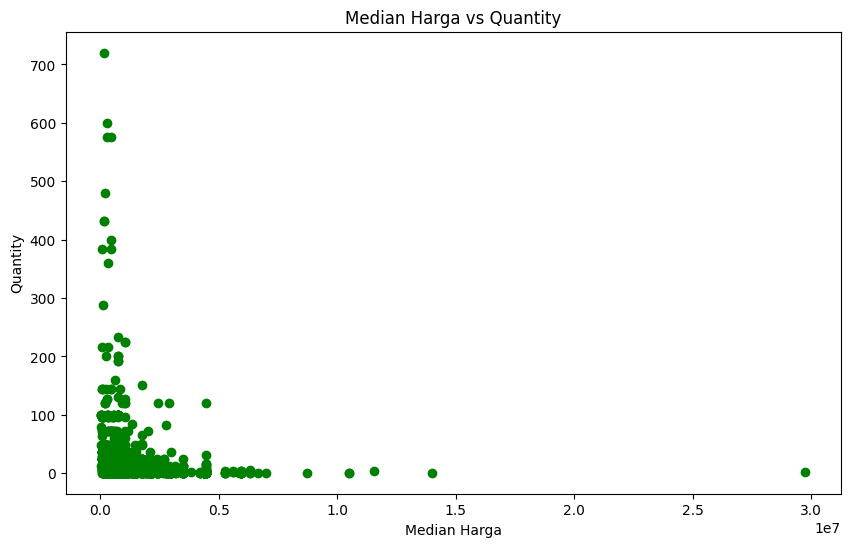

Korelasi median harga vs quantity: -0.12280868707213452


In [51]:
# Menghitung median harga untuk setiap product_id
median_harga = df.groupby('product_id')['item_price'].median()

# Menambahkan kolom 'median_harga' ke DataFrame
df['median_harga'] = df['product_id'].map(median_harga)

# Scatterplot: Median Harga vs Quantity
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['median_harga'], df['quantity'], color='green')

# Mengatur label dan judul
ax.set_xlabel('Median Harga')
ax.set_ylabel('Quantity')
ax.set_title('Median Harga vs Quantity')

# Menampilkan scatterplot
plt.show()

# Menghitung korelasi antara median harga dan quantity
correlation_medianharga_quantity = df['median_harga'].corr(df['quantity'])
print("Korelasi median harga vs quantity:", correlation_medianharga_quantity)
